# Importação

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns

In [3]:
base_credit=pd.read_csv('/content/credit_data.csv')
base_credit

clientid        income        age         loan  default
0            1  66155.925095  59.017015  8106.532131        0
1            2  34415.153966  48.117153  6564.745018        0
2            3  57317.170063  63.108049  8020.953296        0
3            4  42709.534201  45.751972  6103.642260        0
4            5  66952.688845  18.584336  8770.099235        1
...        ...           ...        ...          ...      ...
1995      1996  59221.044874  48.518179  1926.729397        0
1996      1997  69516.127573  23.162104  3503.176156        0
1997      1998  44311.449262  28.017167  5522.786693        1
1998      1999  43756.056605  63.971796  1622.722598        0
1999      2000  69436.579552  56.152617  7378.833599        0

[2000 rows x 5 columns]

In [22]:
base_credit.shape

(2000, 5)

# Visualização

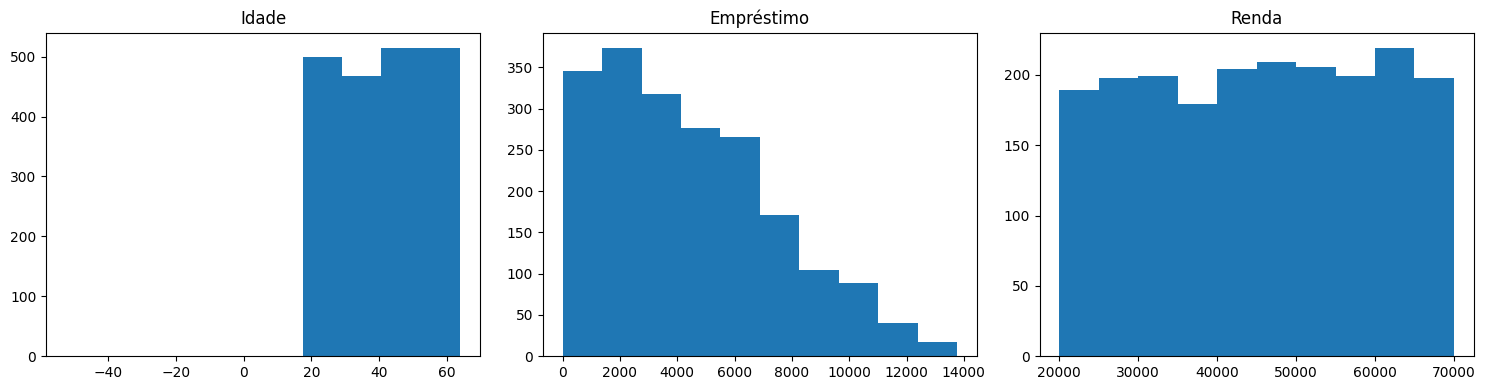

In [ ]:
fig, axes = plt.subplots(1, 3, figsize=(15, 4))  # 1 linha, 3 colunas

# Histograma da idade
axes[0].hist(base_credit['age'])
axes[0].set_title('Idade')

# Histograma do empréstimo
axes[1].hist(base_credit['loan'])
axes[1].set_title('Empréstimo')

# Histograma da renda
axes[2].hist(base_credit['income'])
axes[2].set_title('Renda')

plt.tight_layout()  # Ajusta o espaçamento automaticamente
plt.show()


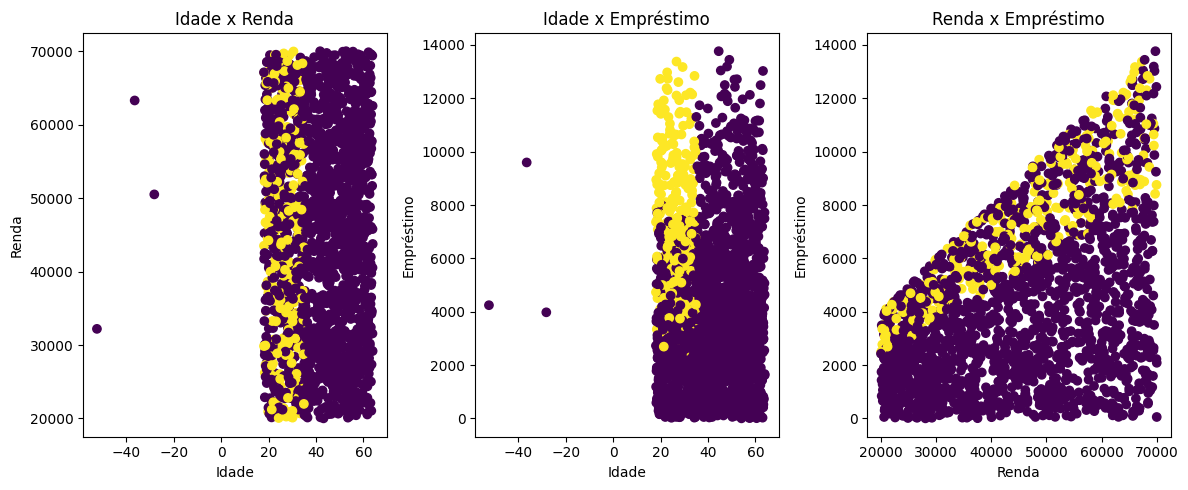

In [ ]:
fig, axes = plt.subplots(1, 3, figsize=(12, 5))  # 1 linha, 2 colunas

# Gráfico 1: idade vs renda
axes[0].scatter(base_credit['age'], base_credit['income'], c=base_credit['default'])
axes[0].set_title('Idade x Renda')
axes[0].set_xlabel('Idade')
axes[0].set_ylabel('Renda')

# Gráfico 2: idade vs empréstimo
axes[1].scatter(base_credit['age'], base_credit['loan'], c=base_credit['default'])
axes[1].set_title('Idade x Empréstimo')
axes[1].set_xlabel('Idade')
axes[1].set_ylabel('Empréstimo')

# Gráfico 3: renda vs empréstimo
axes[2].scatter(base_credit['income'], base_credit['loan'], c=base_credit['default'])
axes[2].set_title('Renda x Empréstimo')
axes[2].set_xlabel('Renda')
axes[2].set_ylabel('Empréstimo')

plt.tight_layout()
plt.show()


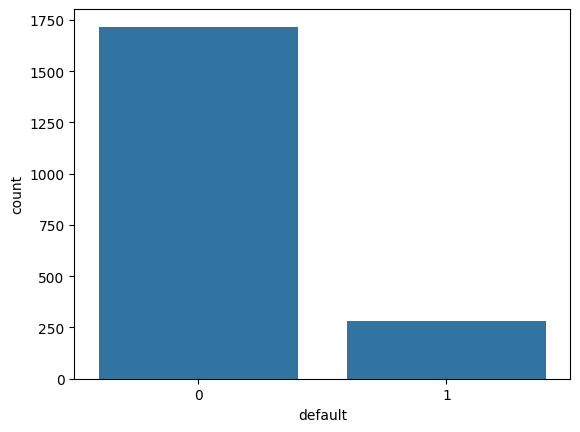

In [ ]:
sns.countplot(x=base_credit['default']);

# Tratamento de inconsistencias

In [4]:
#preenchendo registros negativos com a media
base_credit['age'][base_credit['age']>0].mean()
base_credit.loc[base_credit['age']<0,'age']=40.92

Valores faltantes

In [5]:
# exibe qtas vezes o valor nulo aparece
base_credit.isnull().sum()

clientid    0
income      0
age         3
loan        0
default     0
dtype: int64

In [6]:
#exibe registro com 'age' nulo
base_credit.loc[pd.isnull(base_credit['age'])]

clientid        income  age         loan  default
28        29  59417.805406  NaN  2082.625938        0
30        31  48528.852796  NaN  6155.784670        0
31        32  23526.302555  NaN  2862.010139        0

In [7]:
#preenchendo registros nulos com a media
base_credit.loc[pd.isnull(base_credit['age']),'age']=40.92

In [8]:
base_credit.loc[ base_credit['clientid'].isin([29,30,31]) ]

clientid        income        age          loan  default
28        29  59417.805406  40.920000   2082.625938        0
29        30  58842.891308  54.510948  10871.186790        0
30        31  48528.852796  40.920000   6155.784670        0

# Preparo Base Treinamento e Teste

Features  (previsoras) e Target(Classe)

In [9]:
features = base_credit.iloc[:,1:4].values
target  = base_credit.iloc[:,4].values
features,target

(array([[6.61559251e+04, 5.90170151e+01, 8.10653213e+03],
        [3.44151540e+04, 4.81171531e+01, 6.56474502e+03],
        [5.73171701e+04, 6.31080495e+01, 8.02095330e+03],
        ...,
        [4.43114493e+04, 2.80171669e+01, 5.52278669e+03],
        [4.37560566e+04, 6.39717958e+01, 1.62272260e+03],
        [6.94365796e+04, 5.61526170e+01, 7.37883360e+03]]),
 array([0, 0, 0, ..., 1, 0, 0]))

Escalonamento

In [10]:
#menores 'income, 'age' e 'loan'
print( 'Income: ', features[:,0].min(), ' a ', features[:,0].max())
print( 'Age: ', features[:,1].min(), ' a ', features[:,1].max())
print( 'Loan: ', features[:,2].min(), ' a ', features[:,2].max())

Income:  20014.4894700497  a  69995.6855783239
Age:  18.055188510566897  a  63.971795841120205
Loan:  1.37762959325451  a  13766.0512393337


In [11]:
from sklearn.preprocessing import StandardScaler
scaler_credit = StandardScaler()
features = scaler_credit.fit_transform(features)

#menores 'income, 'age' e 'loan'
print( 'Income: ', features[:,0].min(), ' a ', features[:,0].max())
print( 'Age: ', features[:,1].min(), ' a ', features[:,1].max())
print( 'Loan: ', features[:,2].min(), ' a ', features[:,2].max())

Income:  -1.7676158019964077  a  1.7220222385319197
Age:  -1.7264136699193273  a  1.7393682629606835
Loan:  -1.4592791099462408  a  3.0616609141708273


Divisao Treino e Teste

In [12]:
from sklearn.model_selection import train_test_split
# 25% de teste:
# treinamento: 1500 registros ,  teste: 500 regsitros
features_treinamento, features_teste, target_treinamento, target_teste = train_test_split(features, target, test_size=.25,random_state=0)

In [13]:
# exibe qtde de registros de cada base
print( 'Treinamento: ', features_treinamento.shape, target_treinamento.shape)
print( 'Teste: ', features_teste.shape, target_teste.shape)

Treinamento:  (1500, 3) (1500,)
Teste:  (500, 3) (500,)


# Treinamento

In [14]:
from sklearn.ensemble import RandomForestClassifier
floresta = RandomForestClassifier(n_estimators=40, criterion='entropy', random_state=0)
floresta.fit(features_treinamento, target_treinamento)

RandomForestClassifier(criterion='entropy', n_estimators=40, random_state=0)

Previsão

In [15]:
previsao = floresta.predict(features_teste)

Desempenho :  Accuraty: comparar a 'previsao' com o target_teste

support: é base de teste, onde 436 pagam e 64 não pagam

Recall: algoritmo consegue identificar corretamente       
*   99% (433/436) dos que pagam e
*   92%(59/64) dos que não pagam

Precision: quando  identifica
* quem paga,    acerta 99% = 433 / (433 + 5)          
* quem não paga, acerta 95% = 59 / (59 + 3)


          

0.984

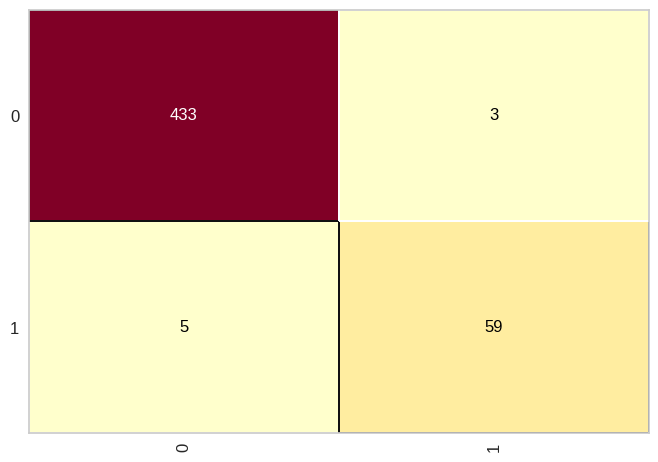

In [16]:
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
from yellowbrick.classifier import ConfusionMatrix
cm = ConfusionMatrix(floresta)
cm.fit(features_treinamento, target_treinamento)
cm.score(features_teste, target_teste)

In [ ]:
# horizontal -> real     vertical -> opniao
print(classification_report(target_teste, previsao))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99       436
           1       0.95      0.92      0.94        64

    accuracy                           0.98       500
   macro avg       0.97      0.96      0.96       500
weighted avg       0.98      0.98      0.98       500



# Tunning

VALORES DEFAULT

*   criterion{“gini”, “entropy”, “log_loss”}, default=”gini”

*   min_samples_split:int or float, default=2

*   min_samples_leaf:int or float, default=1

*   n_estimators:int, default=100

In [17]:
from sklearn.model_selection import GridSearchCV

parametros={'criterion':['gini','entropy'],
            'min_samples_leaf':[1,5,10],
            'min_samples_split':[2,5,10],
            'n_estimators':[10,40,100,150]
            }
grid=GridSearchCV(estimator=RandomForestClassifier(),param_grid=parametros)
grid.fit(features,target)
print ('Melhores parametros: ', grid.best_params_)
print ('Melhor score:' ,grid.best_score_)

Melhores parametros:  {'criterion': 'gini', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 150}
Melhor score: 0.9884999999999999


# Cross validation

O formato da distribuição não tem relação com o desempenho, ele só serve para determinar qual o tipo de teste que nós temos que aplicar para comparar o desempenho dos algoritmos e determinar se a diferença é estatisticamente significativa. Independente do formato da distribuição, caso o teste adequado mostre que não há diferença significativa, então por mais que a rede neural tenha tido um desempenho melhor, essa melhora pode ser atribuída ao acaso, e não a um desempenho verdadeiramente melhor. A conclusão seria que tanto faz escolher a rede neural ou qualquer um dos outros modelos.

A cada rodada teremos 10 testes de validação cruzada, por causa do K=10. Logo teremos, a base dividida em 10 pedaços, sendo uma para teste.

Ao final teremos 300 testes do algoritmo

n_splits: números de Folds

shuffle: sempre mistura os dados

random_state

In [18]:
# Vamos avaliar o Accuracy, mas poderímos avaliar o Precision, o Recall, ...

from sklearn.model_selection import cross_val_score, KFold
from sklearn.ensemble import RandomForestClassifier

resultados_random_forest=[]

for i in range(30):
  kfold = KFold(n_splits=10, shuffle=True,random_state=i)
  random_forest = RandomForestClassifier(criterion='gini',
                                       min_samples_leaf=1,
                                       min_samples_split=5,
                                       n_estimators=150)

  scores = cross_val_score(random_forest,
                         features,
                         target,
                         cv= kfold)

  resultados_random_forest.append(scores.mean())

#exibe
round( np.mean(resultados_random_forest), 5)


np.float64(0.98792)

In [20]:
media = np.mean(resultados_random_forest)
variancia = np.var(resultados_random_forest)*100000
desvio_padrao = np.std(resultados_random_forest)

print(f"Média da acurácia: {media:.5f}")
print(f"Variância: {variancia:.8f}")
print(f"Desvio padrão: {desvio_padrao:.5f}")

Média da acurácia: 0.98792
Variância: 0.16013889
Desvio padrão: 0.00127
